In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow-datasets

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.9
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.2.0.35.34
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

In [ ]:
import tensorflow_datasets as tfds


In [ ]:
df=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CXIC6N_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CXIC6N_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
type(df)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
df.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [ ]:
import numpy as np

In [ ]:
import numpy as np


In [ ]:
dataiterator=df.as_numpy_iterator()

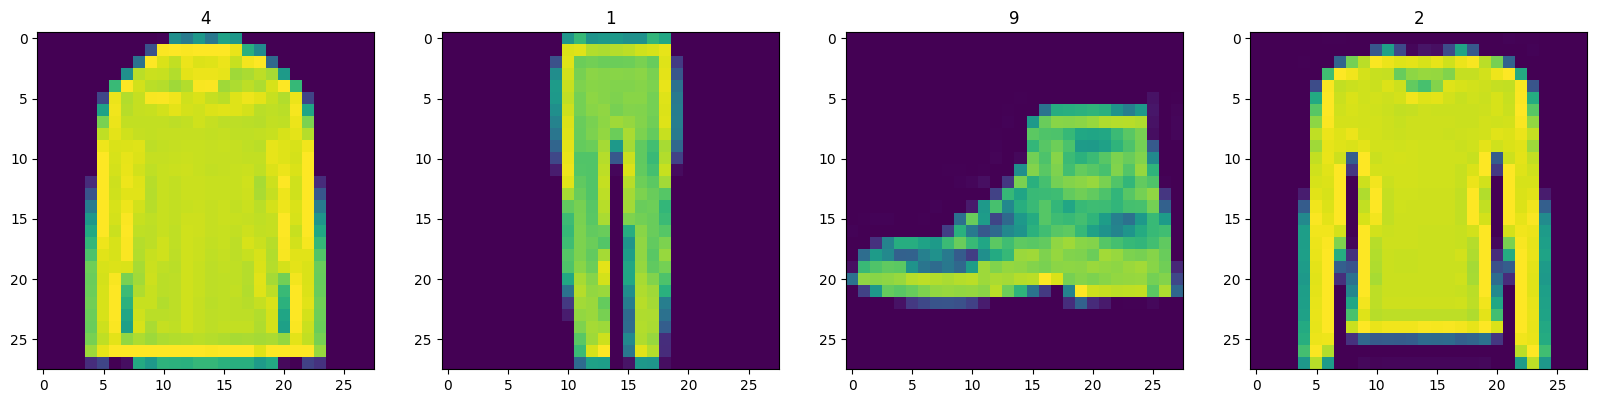

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch=dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [ ]:
def scale_image(data):
  image=data['image']
  return image/255


In [ ]:
# map
# cacheshuffle
# batch
# prefetch

ds=tfds.load('fashion_mnist',split='train')
ds=ds.map(scale_image)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Building the Network


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
from keras.layers import Reshape

In [ ]:
from keras.layers import UpSampling2D

In [ ]:
def build_generator():

  model=Sequential()


  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
  return model

In [ ]:
test_model=build_generator()
test_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
generator=build_generator()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
img=generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
img

array([[[[0.50308055],
         [0.50763357],
         [0.5092596 ],
         ...,
         [0.51171285],
         [0.50661254],
         [0.5001795 ]],

        [[0.4996837 ],
         [0.5060338 ],
         [0.51035166],
         ...,
         [0.5137836 ],
         [0.5086944 ],
         [0.50214523]],

        [[0.50236213],
         [0.51027113],
         [0.5176337 ],
         ...,
         [0.5135326 ],
         [0.5038843 ],
         [0.49979982]],

        ...,

        [[0.50029105],
         [0.50112396],
         [0.49413013],
         ...,
         [0.49953848],
         [0.5020922 ],
         [0.4994293 ]],

        [[0.5049156 ],
         [0.50128645],
         [0.4935632 ],
         ...,
         [0.50296414],
         [0.50642663],
         [0.49983972]],

        [[0.49906573],
         [0.49788776],
         [0.49472877],
         ...,
         [0.5001489 ],
         [0.50119895],
         [0.49922562]]],


       [[[0.5029482 ],
         [0.5056207 ],
         [0.49

In [ ]:
img[0].shape

(28, 28, 1)

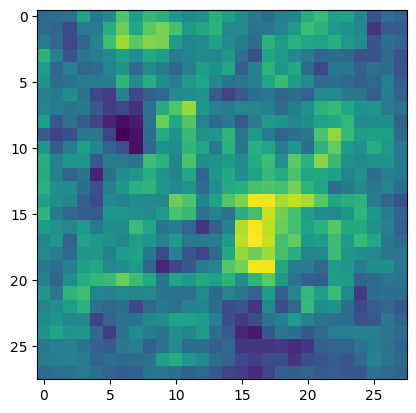

In [ ]:
plt.imshow(img[3])

In [ ]:
def build_discriminator():
  model=Sequential()

  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator=build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_42 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_43 (LeakyReLU)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


array([[0.49527702],
       [0.49506563],
       [0.49522206],
       [0.49519622]], dtype=float32)

In [ ]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [ ]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()


In [ ]:
from keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)

    self.generator=generator
    self.discriminator=discriminator



  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):


    super().compile(*args,**kwargs)

    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss


  def train_step(self,batch):

    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)


    with tf.GradientTape() as d_tape:
      yhat_real=self.discriminator(real_images,training=True)
      yhat_fake=self.discriminator(fake_images,training=True)

      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)

      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      d_loss_value=self.d_loss(y_realfake,yhat_realfake)

      noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake=0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
      predicted_labels=self.discriminator(gen_images,training=False)
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}


In [ ]:
fashgan=FashionGAN(generator,discriminator)

In [ ]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self,num_img=4,latent_dim=128,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.num_img=num_img
    self.latent_dim=latent_dim
  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors=tf.random.normal(shape=(self.num_img,self.latent_dim))
    generated_images=self.model.generator(random_latent_vectors)
    generated_images*=255
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(f"generated_img{epoch}-{i}.png")

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# ... (Your existing code for building the model, etc.) ...

class ModelMonitor(Callback):
    def __init__(self, num_img=4, latent_dim=128, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(f"generated_img{epoch}-{i}.png")

# Define a ModelCheckpoint callback to save weights during training
checkpoint_filepath = 'generator_weights.weights.h5'  # Choose a filename for the weights file, ending with '.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,  # Save only the weights
    verbose=1,  # Print a message when saving
)

# Train the model, including the ModelCheckpoint callback
hist = fashgan.fit(
    ds,
    epochs=10,
    callbacks=[model_checkpoint_callback]  # Pass the callback to the fit method
)

# ... (Rest of your code) ...

# Now you can load the saved weights
generator.load_weights(checkpoint_filepath)  # Load from the saved file
imgs = generator.predict(np.random.randn(16, 128, 1))

In [ ]:
# Assuming you saved the weights as 'generator_weights.weights.h5'
from tensorflow import keras

# 1. Recreate the generator model with the same architecture
generator = build_generator() # Assuming 'build_generator' function is defined as before

# 2. Load the weights into the recreated model
generator.load_weights('generator_weights.weights.h5')

# Now you can use the 'generator' to generate images
imgs = generator.predict(np.random.randn(16, 128, 1))
plt.imshow(imgs[0]) # Display the first generated image, for example

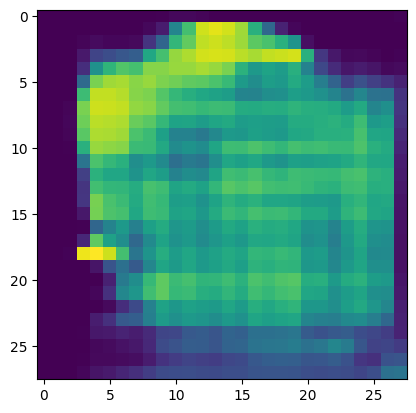

In [ ]:
plt.imshow(imgs[15])